In [1]:
import numpy as np
import pandas as pd
import joblib
import sys, os
sys.path.insert(0, '/home/monte.flora/python_packages/WoF_post')
sys.path.insert(0, '/home/monte.flora/python_packages/ml_workflow')
sys.path.insert(0, '/home/monte.flora/python_packages/wofs_ml_severe')

from wofs_ml_severe.io.load_ml_models import load_ml_model
from wofs.post.utils import load_yaml
import skexplain 
from skexplain.common.importance_utils import to_skexplain_importance 

lookup_file: /home/monte.flora/python_packages/WoF_post/wofs/data/psadilookup.dat
lookup_file: /home/monte.flora/python_packages/WoF_post/wofs/data/psadilookup.dat


In [2]:
time = 'first_hour'
target = 'wind_severe_0km'

ml_config = load_yaml(
    '/home/monte.flora/python_packages/wofs_ml_severe/wofs_ml_severe/conf/ml_config_realtime.yml')
parameters = {
                'target' : target,
                'time' : time, 
                'drop_opt' : '',
                'model_name' : 'LogisticRegression',
                'ml_config' : ml_config,
            }

model_dict = load_ml_model(**parameters)
model = model_dict['model']
features = model_dict['X'].columns

In [3]:
base_est = model.calibrated_classifiers_[0].base_estimator

# Get the model coefficients. 
coef = base_est.named_steps['model'].coef_[0, :]

coef_rank = to_skexplain_importance(coef, estimator_name='LR', feature_names=features, 
                                   method = 'coefs'
                                   )

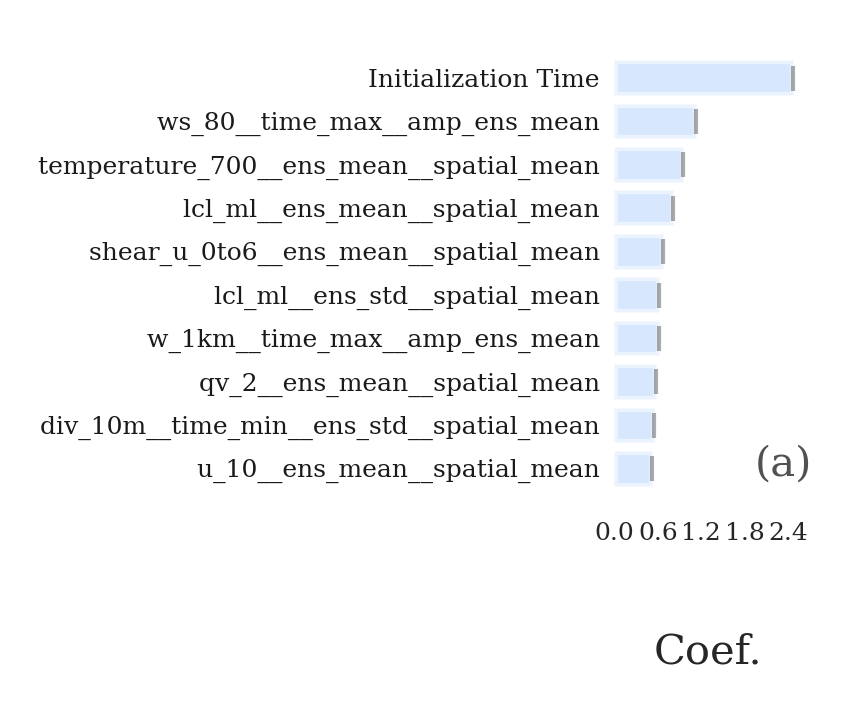

In [4]:
%matplotlib inline
data = [coef_rank]
panels = [('coefs', 'LR'), 
          ]

explainer = skexplain.ExplainToolkit()
fig = explainer.plot_importance(data=data, 
                                panels=panels, 
                                num_vars_to_plot=10, 
                               )